In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import nxviz as nv
from nxviz import MatrixPlot, ArcPlot, CircosPlot
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [17]:
nodes = pd.read_csv('processed_data/nodes_updated.csv', sep='\t').iloc[:, 1:]

In [18]:
nodes.head()

,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,autism_subtype_broad,n_genes,is_autism,Degree_Centrality,Betweenness_Centrality,Degree
0,C0019209,Hepatomegaly,phenotype,C06;C23,Finding,Not Autism,43,False,0.002908,0.000136,30
1,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,Not Autism,1022,False,0.045759,0.004062,472
2,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,Not Autism,84,False,0.033640,0.001213,347
3,C0007102,Malignant tumor of colon,disease,C04;C06,Neoplastic Process,Not Autism,150,False,0.046049,0.002123,475
4,C0009375,Colonic Neoplasms,group,C04;C06,Neoplastic Process,Not Autism,143,False,0.044983,0.001783,464


In [19]:
autism_nodes = nodes[nodes['diseaseId'].str.contains("A")]
autism_nodes.sort_values(by='Degree_Centrality', ascending=False)

,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,autism_subtype_broad,n_genes,is_autism,Degree_Centrality,Betweenness_Centrality,Degree
87,A00,Autism Spectrum Disorder,disease,F03,Mental or Behavioral Dysfunction,Polygenic Autism,292,True,0.031895,4.950943e-03,329
965,A09,Hamartoma tumor Syndrome,disease,C04;C16,Neoplastic Process,Syndromic Autism,9,True,0.011634,1.537358e-03,120
2039,A14,Noonan Syndrome,disease,C04;C05;C10;C14;C16;C17;C23,Disease or Syndrome,Syndromic Autism,35,True,0.008725,1.539550e-03,90
5056,A04,Tuberous Sclerosis Complex,disease,C04;C10;C12;C13;C16,Disease or Syndrome,Syndromic Autism,4,True,0.007853,6.666610e-04,81
2038,A08,Neurofibromatosis,disease,C04;C09;C10;C16;C17;C23,Disease or Syndrome,Syndromic Autism,32,True,0.007465,6.009356e-04,77
2263,A10,Down Syndrome,disease,C04;C09;C10;C11;C15;C16;C23;F01;F03,Disease or Syndrome,Syndromic Autism,23,True,0.006398,1.181883e-04,66
3723,A01,Rett Syndrome,disease,C10;C16,Disease or Syndrome,Syndromic Autism,9,True,0.005914,1.147054e-03,61
6754,A17,Macrocephaly/Autism Syndrome,disease,C05;C10;C16;C23;F03,Disease or Syndrome,Syndromic Autism,2,True,0.003005,2.774138e-04,31
5703,A03,MECP2 duplication Syndrome,disease,C10;C16,Disease or Syndrome,Syndromic Autism,1,True,0.002908,5.192862e-08,30
1354,A02,Fragile X Syndrome,disease,C10;C16;C23,Disease or Syndrome,Syndromic Autism,3,True,0.002811,7.641914e-05,29


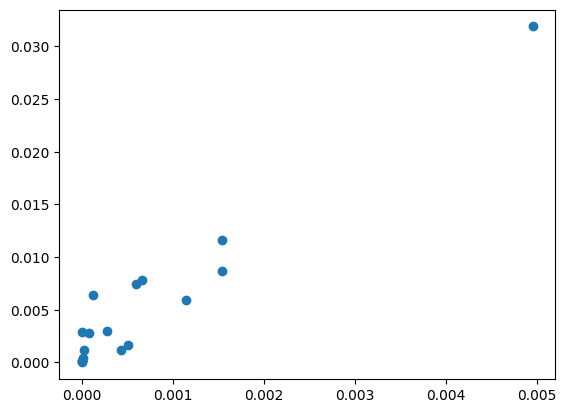

In [20]:
plt.scatter(autism_nodes['Betweenness_Centrality'], autism_nodes['Degree_Centrality'])
plt.show()

<Axes: xlabel='Degree_Centrality', ylabel='Betweenness_Centrality'>

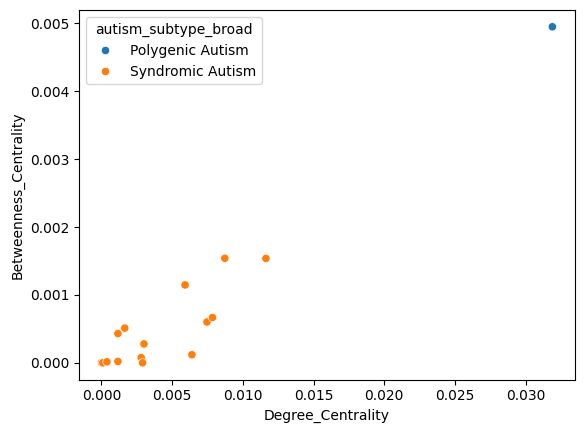

In [14]:
sns.scatterplot(data=autism_nodes, x='Degree_Centrality', y='Betweenness_Centrality', hue='autism_subtype_broad')

<Axes: xlabel='Degree_Centrality', ylabel='Betweenness_Centrality'>

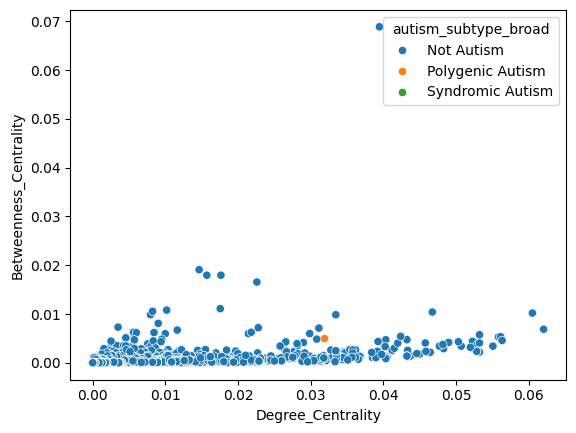

In [30]:
sns.scatterplot(data=nodes, x='Degree_Centrality', y='Betweenness_Centrality', hue='autism_subtype_broad', alpha=1)

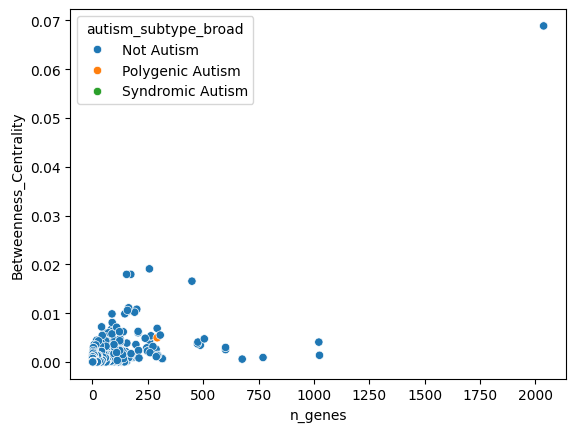

In [32]:
sns.scatterplot(data=nodes, x='n_genes', y='Betweenness_Centrality', hue='autism_subtype_broad', alpha=1)
plt.show()

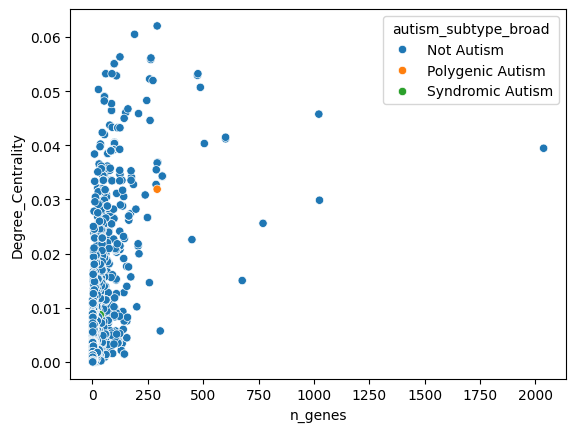

In [33]:
sns.scatterplot(data=nodes, x='n_genes', y='Degree_Centrality', hue='autism_subtype_broad', alpha=1)
plt.show()

In [29]:
nodes['Betweenness_Centrality'].describe()

count    10316.000000
mean         0.000186
std          0.000948
min          0.000000
25%          0.000000
50%          0.000002
75%          0.000101
max          0.068866
Name: Betweenness_Centrality, dtype: float64